# Data Preprocessing


In [1]:
import pandas as pd

In [2]:
data2=pd.read_csv("Books_rating.csv")
data2=data2.sort_values(by='review/time')
data2.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2971452,B000G167FA,Silver Pennies,NaN,A186DM3LK926XA,Jill M. Bowden,1/1,5.0,-1,A joyful find!,This book was given to me when I was three yea...
2971449,B000G167FA,Silver Pennies,NaN,A1MCQGDJDSPJFF,SHOCKgBLUE@aol.com,4/4,5.0,-1,Unequalled Collection of Children's Poetry for...,I was introduced to this marvelous collection ...
2971448,B000G167FA,Silver Pennies,NaN,AAFZZHA2I598B,Byron C. Benson,4/4,5.0,-1,An incomparable children's classic,This book of children's poems has been enjoyed...
2971447,B000G167FA,Silver Pennies,NaN,NaN,NaN,5/5,5.0,-1,Silver Pennies,"I received my copy of this book 45 years ago, ..."
2971446,B000G167FA,Silver Pennies,NaN,AZUNT3QP2CWTL,"Ellen C. Falkenberry ""ellenf""",5/5,5.0,-1,Have you ever watched the fairies when the rai...,Although the new cover looks more like a Book ...


In [3]:
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text="this product doesn't tasty like"
class pre_process:
    # Function to clean HTML tags
    def clean_html(self,text):
        return BeautifulSoup(text, "lxml").text
    
    def replace_negations(self, text):
        cleaned_text = re.sub(r'\d+', '', text)
        return re.sub(r"n\'t", " not", cleaned_text)

    # Function to remove punctuation
    def remove_punctuation(self,text):
        return text.translate(str.maketrans('', '', string.punctuation))

    # Function to remove stopwords
    def remove_stopwords(self,text):
        stop_words = set(stopwords.words('english'))
        # Retain negations and intensifiers for sentiment analysis
        important_stopwords = {'not', 'no', 'never', 'very', 'really', 'extremely', 'but'}
        stop_words = stop_words - important_stopwords
        word_tokens = word_tokenize(text)
        filtered_text = [word for word in word_tokens if not word in stop_words]
        return ' '.join(filtered_text)
    
abc=pre_process()
text=abc.replace_negations(text)
print(text)
print(abc.remove_stopwords(text))


this product does not tasty like
product not tasty like


In [4]:
data3=data2[0:100000]

In [5]:
data3 = data3.drop(['Title', 'Price', 'profileName'], axis=1)
for i in range(len(data3)):
    index_names = data3[data3['review/score'] == 3.0].index
    data3.reset_index(drop=True, inplace=True)
    if(data3.loc[i,'review/score']>2.0): data3.loc[i,'review/score']=1
    else: data3.loc[i,'review/score']=0

data3.head()

,Id,User_id,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000G167FA,A186DM3LK926XA,1/1,1.0,-1,A joyful find!,This book was given to me when I was three yea...
1,B000G167FA,A1MCQGDJDSPJFF,4/4,1.0,-1,Unequalled Collection of Children's Poetry for...,I was introduced to this marvelous collection ...
2,B000G167FA,AAFZZHA2I598B,4/4,1.0,-1,An incomparable children's classic,This book of children's poems has been enjoyed...
3,B000G167FA,NaN,5/5,1.0,-1,Silver Pennies,"I received my copy of this book 45 years ago, ..."
4,B000G167FA,AZUNT3QP2CWTL,5/5,1.0,-1,Have you ever watched the fairies when the rai...,Although the new cover looks more like a Book ...


In [6]:
abc = pre_process()
for i in range(len(data3)):
    data3.loc[i, "review/text"] = abc.clean_html(data3.loc[i, "review/text"])
    data3.loc[i, "review/text"] = abc.replace_negations(data3.loc[i, "review/text"])
    data3.loc[i, "review/text"] = abc.remove_punctuation(data3.loc[i, "review/text"])
    data3.loc[i, "review/text"] = abc.remove_stopwords(data3.loc[i, "review/text"])
    

C:\Users\singh\AppData\Local\Temp\ipykernel_16772\2913584255.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


In [7]:
print(data3["review/text"][0])

This book given I three years old sixty years ago It part life continues first last prayer day God fairies true true I child waits youPlease share everyone know magic continue


# Convert text review to numerical vector using Word2Vec

In [8]:
i=0
list_of_words=[]
for sent in data3['review/text'].values:
    words=[]
    for j in sent.lower().split(' '):
        words.append(j)
    list_of_words.append(words)

In [9]:
print(len(list_of_words))

100000


In [10]:
print(list_of_words[0])

['this', 'book', 'given', 'i', 'three', 'years', 'old', 'sixty', 'years', 'ago', 'it', 'part', 'life', 'continues', 'first', 'last', 'prayer', 'day', 'god', 'fairies', 'true', 'true', 'i', 'child', 'waits', 'youplease', 'share', 'everyone', 'know', 'magic', 'continue']


In [11]:
import gensim
my_model = gensim.models.Word2Vec(list_of_words, min_count=1, vector_size=40, workers=4)

In [12]:
total_words = list(my_model.wv.key_to_index)
print(len(total_words))


178110


In [13]:
import numpy as np
new_word_vector=[]
for i in list_of_words:
    d_dim=np.zeros(40)
    count_words=0
    for word in i:
        d_dim+=my_model.wv[word]
        count_words+=1
    d_dim/=count_words
    new_word_vector.append(d_dim)
            

In [14]:
print(new_word_vector[0])

[ 0.43318474  0.51000728 -1.3990999   0.23496507  0.73739321  0.3935833
  0.00578249  0.84335799 -0.04914201 -0.41592397  0.80974358 -0.48316211
  1.08147655 -0.18908207  1.33532763  0.34117052  1.89088161 -0.00806389
 -0.79426992 -0.0890901   0.02731231 -0.56881548  1.96120817  1.7210486
 -0.0078398   0.1412629  -0.56110808 -0.21595446 -0.66238015  1.42525983
  0.94383267  1.37403556  1.85394016  0.53771636 -0.3792562  -1.10493178
  1.54401349 -0.36995276 -0.21758932  0.91200026]


# Visualization using T-SNE

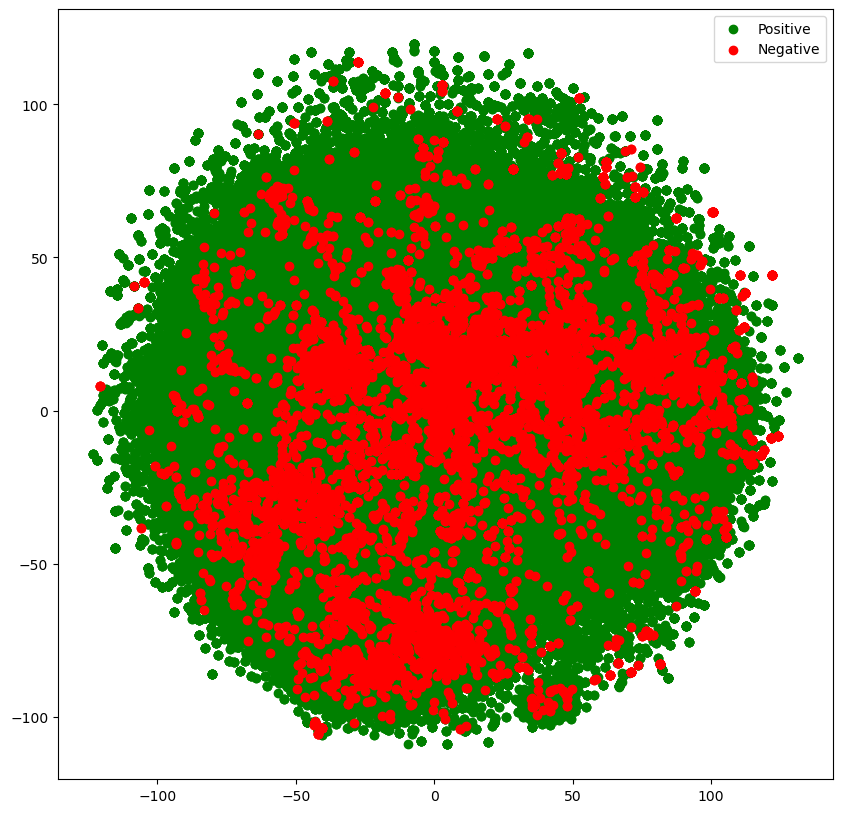

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=0)
points = tsne.fit_transform(np.array(new_word_vector))
positive_points = points[data3['review/score'] == 1]
negative_points = points[data3['review/score'] == 0]
plt.figure(figsize=(10, 10))
plt.scatter(positive_points[:, 0], positive_points[:, 1], c='green', label='Positive')
plt.scatter(negative_points[:, 0], negative_points[:, 1], c='red', label='Negative')
plt.legend()
plt.show()


# TF-IDF Word2Vec

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_matrix = tfidf_vectorizer.fit_transform(data3['review/text'].values)

In [17]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [18]:
print(len(feature_names),type(feature_names))
feature_name=feature_names.tolist()

2207218 <class 'numpy.ndarray'>


In [19]:
import numpy as np

word_indices = {word: index for index, word in enumerate(feature_name)}

tf_idf_word_vec = []
for i, words in enumerate(list_of_words):
    d_dim2 = np.zeros(40)
    count_words2 = 0
    for word in words:
        try:
            word_index = word_indices.get(word)
            if word_index is not None:
                tfidf_value = tfidf_matrix[i, word_index]
                d_dim2 += my_model.wv[word] * tfidf_value
                count_words2 += tfidf_value
        except: 
            pass
    if count_words2 != 0:
        d_dim2 /= count_words2
    tf_idf_word_vec.append(d_dim2)


# T-SNE for tf-idf word2vec

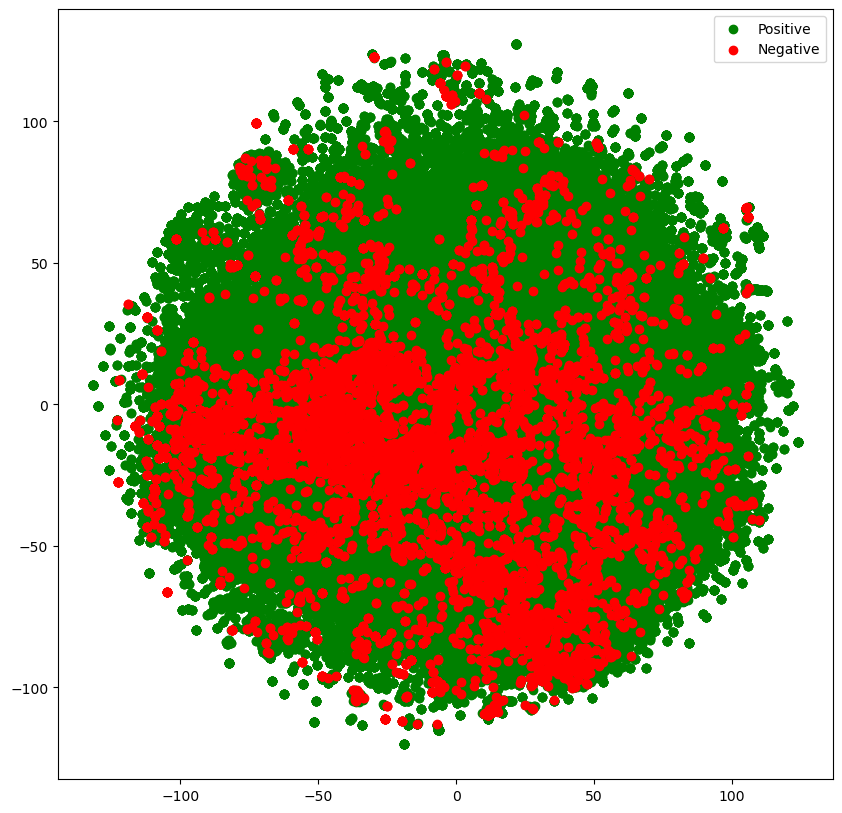

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=0)
points = tsne.fit_transform(np.array(tf_idf_word_vec))
positive_points = points[data3['review/score'] == 1]
negative_points = points[data3['review/score'] == 0]
plt.figure(figsize=(10, 10))
plt.scatter(positive_points[:, 0], positive_points[:, 1], c='green', label='Positive')
plt.scatter(negative_points[:, 0], negative_points[:, 1], c='red', label='Negative')
plt.legend()
plt.show()


# Perform KNN using Avg W2V

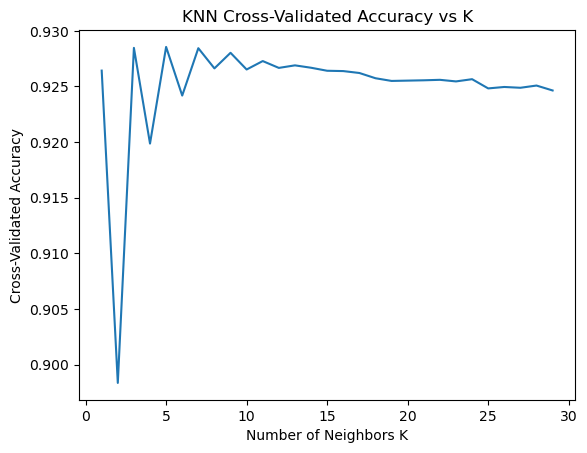

In [21]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data_KNN=data3
X = new_word_vector
y = data_KNN['review/score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
k_values = range(1, 30)
cv_scores = []

cv = KFold(n_splits=10, random_state=1, shuffle=True)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validated Accuracy vs K')
plt.show()


In [22]:
from sklearn.metrics import accuracy_score
best_k = cv_scores.index(max(cv_scores)) + 1 
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.3f}')


Test Accuracy: 0.929


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[  687  1630]
 [  509 27174]]


# Perform KNN using tf-idf

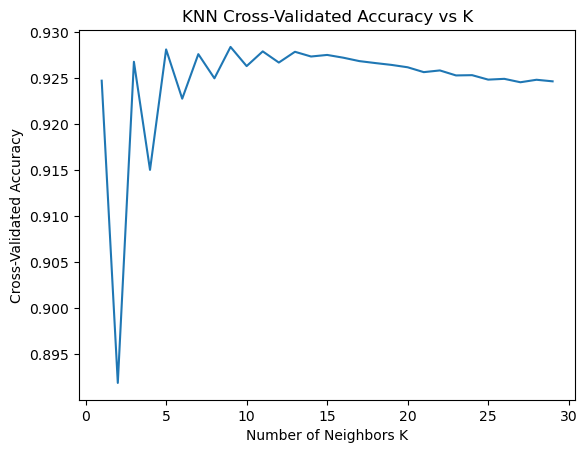

In [24]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data_KNN=data3
X = tf_idf_word_vec
y = data_KNN['review/score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
k_values = range(1, 30)
cv_scores = []

cv = KFold(n_splits=10, random_state=1, shuffle=True)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validated Accuracy vs K')
plt.show()


In [25]:
from sklearn.metrics import accuracy_score
best_k = cv_scores.index(max(cv_scores)) + 1 
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.3f}')


Test Accuracy: 0.928


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[  504  1813]
 [  334 27349]]


# Logistic Regression with penalty

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
data_KNN=data3
X = tf_idf_word_vec
y = data_KNN['review/score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(penalty='l2',max_iter=10000)
alpha_values = [0.001,0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = {'C': alpha_values}
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='neg_log_loss')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['C']
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best penalty value: ", best_alpha)
print("Accuracy:", accuracy)

Best penalty value:  0.1
Accuracy: 0.92275


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[  128  1402]
 [  143 18327]]


# Classification Using Svm 

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
X = tf_idf_word_vec
y = data_KNN['review/score']


In [30]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['rbf']
}


In [31]:
model = SVC(kernel='rbf')


In [32]:
grid = GridSearchCV(model, param_grid, refit=True, verbose=2)


In [33]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 4.9min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 4.6min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 4.0min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 4.7min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 4.6min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 2.6min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 3.1min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 2.7min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 3.1min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 3.0min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 4.4min
[CV] END .........................C=1, gamma=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [34]:
print(grid.best_params_)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [35]:
model = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
model.fit(X_train, y_train)


SVC(C=10, gamma=0.1)

In [36]:
print(model.score(X_test, y_test))

0.9417


In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[  128  1402]
 [  143 18327]]


# Classification using Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = new_word_vector
y = data_KNN['review/score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the parameter grid
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Create the base model
dtree = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [39]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [40]:
# Train the model with the best parameters
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [41]:
# Evaluate the model
print("Training accuracy:", best_tree.score(X_train, y_train))
print("Test accuracy:", best_tree.score(X_test, y_test))

Training accuracy: 0.9376142857142857
Test accuracy: 0.9261666666666667


In [42]:
y_pred=best_tree.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[  407  1910]
 [  305 27378]]


# Classification using RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
X = new_word_vector
y = data_KNN['review/score']
param_grid = {
    'n_estimators': [5,10],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,5 ,10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt'],
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5], 'n_estimators': [5, 10]},
             verbose=2)

In [45]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Evaluate the model
print("Training accuracy:", best_rf.score(X_train, y_train))
print("Test accuracy:", best_rf.score(X_test, y_test))

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Training accuracy: 0.9934428571428572
Test accuracy: 0.9485666666666667


# Classification using Xgboost

In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
X = tf_idf_word_vec
y = data_KNN['review/score']

In [47]:
parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}


In [48]:
xgb = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

In [49]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=True
)


In [53]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [54]:
best_model = grid_search.best_estimator_


In [55]:
predictions = best_model.predict(X_test)

In [57]:
print("Training accuracy:", best_model.score(X_train, y_train))
print("Test accuracy:", best_model.score(X_test, y_test))

Training accuracy: 0.9968285714285714
Test accuracy: 0.9508


In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions ))

[[  979  1338]
 [  138 27545]]
